In [1]:
import os
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd

notebook_dir = os.getcwd()
data_dir = str(Path(notebook_dir).parents[1] / 'data_samples' / 'geopandas')

In [7]:
lakes_and_rivers_gdf = gpd.read_file(os.path.join(data_dir, 'ne_50m_rivers_lake_centerlines.zip'))

In [8]:
lakes_and_rivers_gdf.head()

,scalerank,featurecla,name,note,min_zoom,name_alt,min_label,name_en,label,wikidataid,...,name_tr,name_vi,name_zh,ne_id,name_fa,name_he,name_uk,name_ur,name_zht,geometry
0,6,Lake Centerline,Kama,None,4.7,None,6.0,Kama,Kama,Q79082,...,Kama,Kama,卡馬河,1159125905,رود کاما,קאמה,Кама,دریائے کاما,卡馬河,"LINESTRING (51.93713 55.70107, 51.88087 55.686..."
1,6,River,Kama,None,4.7,None,6.0,Kama,Kama,Q79082,...,Kama,Kama,卡馬河,1159125917,رود کاما,קאמה,Кама,دریائے کاما,卡馬河,"LINESTRING (53.69385 58.20632, 53.67715 58.273..."
2,3,Lake Centerline,Abay,None,3.0,None,4.0,Lesser Abay,None,Q3501984,...,Abay,Abay,阿拜河,1159125319,ابی,אבאי,Абая,ابے,阿拜,"LINESTRING (37.11301 11.85499, 37.15037 11.893..."
3,3,Lake Centerline,Al Furat,None,3.0,None,4.0,Euphrates,Al Furat,Q34589,...,Fırat,Euphrates,幼发拉底河,1159125935,فرات,פרת,Євфрат,دریائے فرات,幼发拉底河,"LINESTRING (38.56119 35.86264, 38.36534 35.903..."
4,6,Lake Centerline,Alabama,None,5.0,None,6.0,Alabama,Alabama,Q558643,...,Alabama,Alabama,阿拉巴馬河,1159114961,آلاباما,נהר אלבמה,Алабама,البامہ,阿拉巴馬河,"MULTILINESTRING ((-86.52177 33.03212, -86.5209..."


<Axes: >

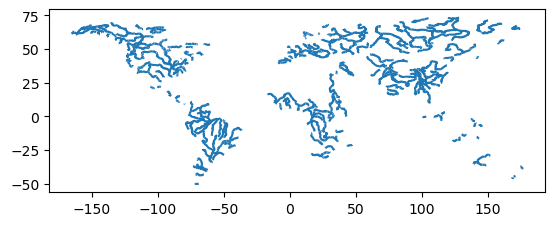

In [10]:
lakes_and_rivers_gdf['geometry'].plot()

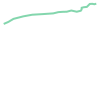

In [19]:
lakes_and_rivers_gdf.iloc[0]['geometry']

In [11]:
rivers_gdf = lakes_and_rivers_gdf[lakes_and_rivers_gdf['featurecla'] == 'River']

In [20]:
countries_gdf = gpd.read_file(os.path.join(data_dir, 'ne_110m_admin_0_countries.zip'))

In [21]:
usa_gdf = countries_gdf[(countries_gdf['SOVEREIGNT'] =='United States of America') & (countries_gdf['TYPE'] =='Country')]

In [22]:
from geopandas.tools import sjoin
usa_rivers_gdf = sjoin(rivers_gdf, usa_gdf, how='inner', predicate='intersects')

<Axes: >

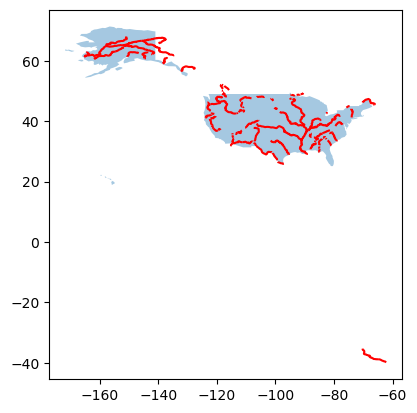

In [23]:
ax = usa_gdf.plot(alpha=0.4)
usa_rivers_gdf.plot(ax=ax, color='r')

In [24]:
usa_rivers_gdf = usa_rivers_gdf.to_crs('ESRI:102005')

In [25]:
usa_rivers_gdf['length'] = usa_rivers_gdf.length

In [26]:
usa_rivers_gdf.sort_values(ascending=False, by='length').head(10)

,scalerank_left,featurecla_left,name,note,min_zoom,name_alt,min_label,name_en,label,wikidataid,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,length
155,5,River,Colorado,None,4.7,None,5.7,Colorado,Colorado,Q270627,...,None,None,None,None,None,None,None,None,None,3.092446e+06
281,1,River,Mississippi,None,2.0,None,3.0,Mississippi,Mississippi,Q1497,...,None,None,None,None,None,None,None,None,None,2.940443e+06
446,3,River,Yukon,None,3.0,None,4.0,Yukon,Yukon,Q104437,...,None,None,None,None,None,None,None,None,None,2.726282e+06
341,4,River,Rio Grande,None,4.0,None,5.0,Grande,Rio Grande,Q160636,...,None,None,None,None,None,None,None,None,None,2.087736e+06
282,1,River,Missouri,None,2.0,None,3.0,Missouri,Missouri,Q5419,...,None,None,None,None,None,None,None,None,None,1.980040e+06
118,4,River,Arkansas,None,4.0,None,5.0,Arkansas,Arkansas,Q8319,...,None,None,None,None,None,None,None,None,None,1.803102e+06
156,3,River,Columbia,None,3.0,None,4.0,Columbia,Columbia,Q2251,...,None,None,None,None,None,None,None,None,None,1.419185e+06
307,3,River,Ohio,None,3.0,None,4.0,Ohio,Ohio,Q4915,...,None,None,None,None,None,None,None,None,None,1.302702e+06
370,4,River,Snake,None,4.0,None,5.0,Snake,Snake,Q272074,...,None,None,None,None,None,None,None,None,None,1.215677e+06
139,6,River,Brazos,None,5.0,None,6.0,Brazos,Brazos,Q903306,...,None,None,None,None,None,None,None,None,None,8.916596e+05


In [ ]:
# 8) The coordinate reference system is important when calculating lengths; if we change the CRS to a different one we can get different ordering
usa_rivers_gdf = usa_rivers_gdf.to_crs('ESRI:102039')
usa_rivers_gdf['length'] = usa_rivers_gdf.length
usa_rivers_gdf.sort_values(ascending=False, by='length').head(10)

,scalerank_left,featurecla_left,name,note,min_zoom,name_alt,min_label,name_en,label,wikidataid,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,length
281,1,River,Mississippi,None,2.0,None,3.0,Mississippi,Mississippi,Q1497,...,None,None,None,None,None,None,None,None,None,2.945217e+06
155,5,River,Colorado,None,4.7,None,5.7,Colorado,Colorado,Q270627,...,None,None,None,None,None,None,None,None,None,2.822305e+06
446,3,River,Yukon,None,3.0,None,4.0,Yukon,Yukon,Q104437,...,None,None,None,None,None,None,None,None,None,2.631815e+06
341,4,River,Rio Grande,None,4.0,None,5.0,Grande,Rio Grande,Q160636,...,None,None,None,None,None,None,None,None,None,2.084828e+06
282,1,River,Missouri,None,2.0,None,3.0,Missouri,Missouri,Q5419,...,None,None,None,None,None,None,None,None,None,1.980771e+06
118,4,River,Arkansas,None,4.0,None,5.0,Arkansas,Arkansas,Q8319,...,None,None,None,None,None,None,None,None,None,1.802689e+06
156,3,River,Columbia,None,3.0,None,4.0,Columbia,Columbia,Q2251,...,None,None,None,None,None,None,None,None,None,1.410218e+06
307,3,River,Ohio,None,3.0,None,4.0,Ohio,Ohio,Q4915,...,None,None,None,None,None,None,None,None,None,1.305883e+06
370,4,River,Snake,None,4.0,None,5.0,Snake,Snake,Q272074,...,None,None,None,None,None,None,None,None,None,1.216002e+06
139,6,River,Brazos,None,5.0,None,6.0,Brazos,Brazos,Q903306,...,None,None,None,None,None,None,None,None,None,8.907839e+05
